In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [7]:
test.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [8]:
train.shape

(517754, 14)

In [9]:
test.shape

(172585, 13)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [12]:
train.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [13]:
test.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
dtype: int64

In [14]:
train.isnull().sum().sort_values(ascending=False).head()

id             0
road_type      0
num_lanes      0
curvature      0
speed_limit    0
dtype: int64

In [15]:
test.isnull().sum().sort_values(ascending=False).head()

id             0
road_type      0
num_lanes      0
curvature      0
speed_limit    0
dtype: int64

In [16]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

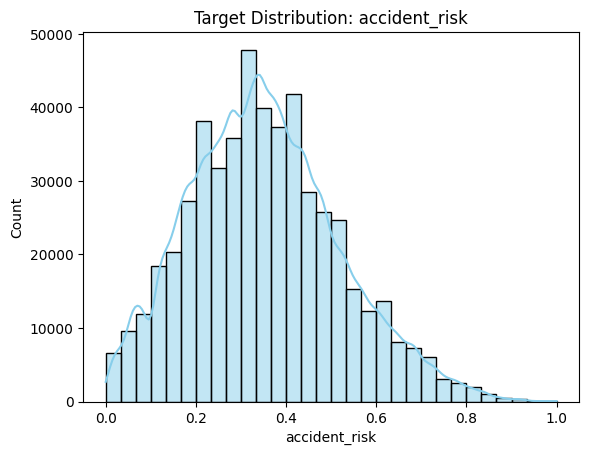

In [17]:
sns.histplot(train['accident_risk'], bins=30, kde=True, color='skyblue')
plt.title("Target Distribution: accident_risk")
plt.show()

In [18]:
# Correlation heatmap (numerical only)
num_cols = train.select_dtypes(include=np.number).columns

In [19]:
corr = train[num_cols].corr()
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

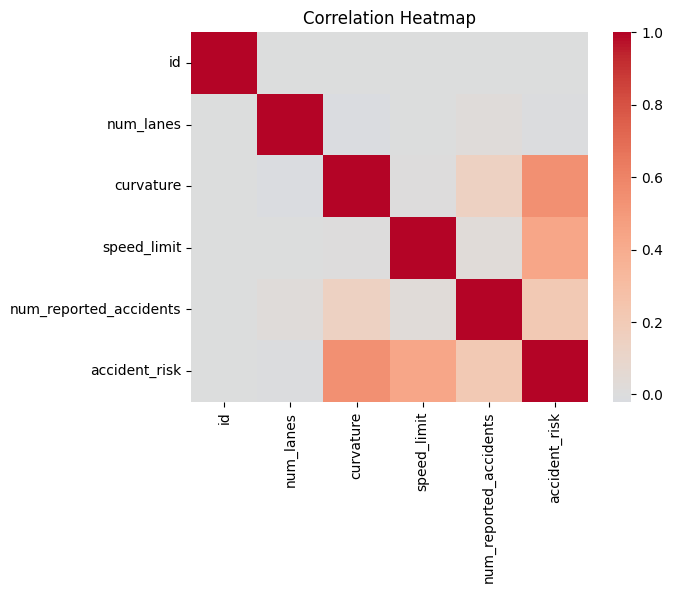

In [20]:
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# Top correlated features with target
corr_target = corr['accident_risk'].drop('accident_risk').sort_values(ascending=False)

In [22]:
print("\nTop 10 correlated features with target:")
display(corr_target.head(10))


Top 10 correlated features with target:


curvature                 0.543946
speed_limit               0.430898
num_reported_accidents    0.213891
id                        0.000969
num_lanes                -0.006003
Name: accident_risk, dtype: float64

In [23]:
# Label encode categorical columns
le = LabelEncoder()

In [24]:
for col in train.select_dtypes(include=["object"]).columns:
    train[col] = le.fit_transform(train[col].astype(str))
    test[col]  = le.transform(test[col].astype(str))

In [25]:
if "Date_Time" in train.columns:
    train["Date_Time"] = pd.to_datetime(train["Date_Time"])
    test["Date_Time"]  = pd.to_datetime(test["Date_Time"])
    train["hour"] = train["Date_Time"].dt.hour
    train["dayofweek"] = train["Date_Time"].dt.dayofweek
    test["hour"] = test["Date_Time"].dt.hour
    test["dayofweek"] = test["Date_Time"].dt.dayofweek
    train.drop(columns=["Date_Time"], inplace=True)
    test.drop(columns=["Date_Time"], inplace=True)

In [26]:
target = "accident_risk"
features = [c for c in train.columns if c not in [target, "id"]]

In [27]:
X = train[features]
y = train[target]

In [28]:
X_test = test[features]

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

In [37]:
X_test  = scaler.transform(X_test)

c:\Users\anujp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror',
    eval_metric='rmse'
)

In [39]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'rmse'


In [40]:
y_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse:.5f}")

Validation RMSE: 0.05648


<Axes: xlabel='None', ylabel='None'>

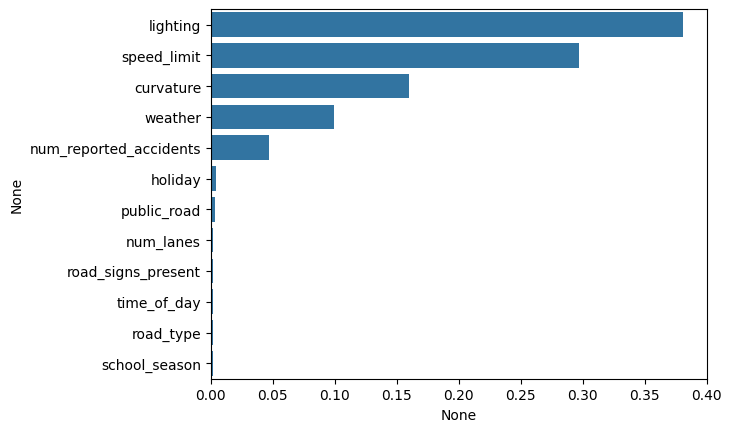

In [41]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=importances.head(15), y=importances.head(15).index)

In [42]:
y_test_pred = model.predict(X_test)
y_test_pred = np.clip(y_test_pred, 0, 1)

In [43]:
submission = pd.DataFrame({
    "id": test["id"],
    "accident_risk": y_test_pred
})

submission.to_csv("submission.csv", index=False)